In [12]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import random

import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dropout, BatchNormalization

In [3]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
# Augmentation
path = 'D:/업무 파일/5. Digital tech 대학_AI/AI 고급 문제 해결 과정/VT3_Augmentation_Final.xlsx'

x = 'Sheet0'
df = pd.read_excel(path, sheet_name = x, header = 0)
df = df.drop(['Unnamed: 0'], axis=1)
df.shape

x=df.copy()
y_obj=x.pop("Bending")

# 전체 데이터에서 학습 데이터와 테스트 데이터(0.2)로 구분
x_train1, x_test, y_train1, y_test = train_test_split(x, y_obj, test_size=0.2,shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔

## 학습 셋에서 학습과 검증 데이터(0.2)로 구분
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)  ## shuffle=True로 하면 데이터를 섞어


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1719.7091603861522, tolerance: 0.5595367015003313
  positive)


Alpha 5e-06 :  score : 0.3641783094875506
R2 score Lasso : 0.36, MSE Lasso : 0.38, MAE Lasso : 0.51



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1713.2118552264578, tolerance: 0.5595367015003313
  positive)


Alpha 1e-05 :  score : 0.3641675072097963
R2 score Lasso : 0.36, MSE Lasso : 0.38, MAE Lasso : 0.51



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1153.7751854853072, tolerance: 0.5595367015003313
  positive)


Alpha 0.0005 :  score : 0.35485259079896614
R2 score Lasso : 0.35, MSE Lasso : 0.39, MAE Lasso : 0.51



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.327449452913, tolerance: 0.5595367015003313
  positive)


Alpha 0.001 :  score : 0.3511877864905716
R2 score Lasso : 0.35, MSE Lasso : 0.39, MAE Lasso : 0.51



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92.75496327652854, tolerance: 0.5595367015003313
  positive)


Alpha 0.005 :  score : 0.3175302459234217
R2 score Lasso : 0.32, MSE Lasso : 0.41, MAE Lasso : 0.52



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.6647074987809, tolerance: 0.5595367015003313
  positive)


Alpha 0.01 :  score : 0.2659585950471247
R2 score Lasso : 0.27, MSE Lasso : 0.44, MAE Lasso : 0.54



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.01851041861846, tolerance: 0.5595367015003313
  positive)


Alpha 0.05 :  score : 0.11054165463889065
R2 score Lasso : 0.11, MSE Lasso : 0.53, MAE Lasso : 0.60

Alpha 0.1 :  score : 0.09171598470387465
R2 score Lasso : 0.09, MSE Lasso : 0.54, MAE Lasso : 0.61

Alpha 0.5 :  score : 0.05412742116529068
R2 score Lasso : 0.05, MSE Lasso : 0.57, MAE Lasso : 0.62

Alpha 0.7 :  score : 0.047395821861908605
R2 score Lasso : 0.05, MSE Lasso : 0.57, MAE Lasso : 0.62



Text(0.5, 0, 'alpha')

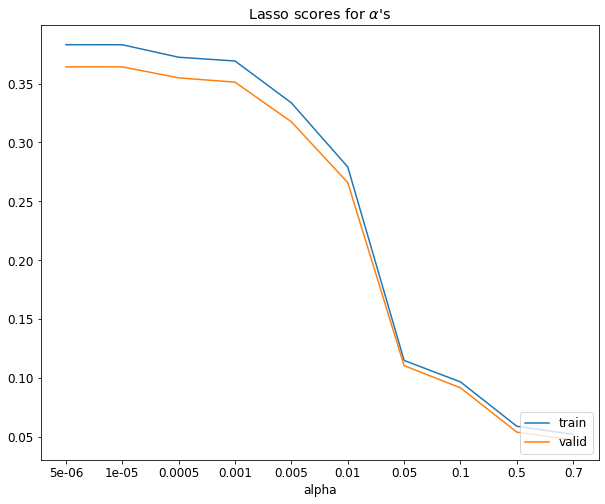

In [82]:
alphas = [0.000005, 0.00001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.7]
train_scores = []
test_scores = []
ws = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(x_train, y_train)
    ws.append(lasso.coef_)
    print('Alpha {} : '.format(a), 'score :', lasso.score(x_valid, y_valid))
    s1 = lasso.score(x_train, y_train)
    s2 = lasso.score(x_valid, y_valid)
    train_scores.append(s1)
    test_scores.append(s2)
    
    lasso_y_hat = lasso.predict(x_valid)
    lasso_r2, lasso_MSE, lasso_MAE = r2_score(y_valid, lasso_y_hat), mean_squared_error(y_valid, lasso_y_hat), mean_absolute_error(y_valid, lasso_y_hat)

    print("R2 score Lasso : %.2f, MSE Lasso : %.2f, MAE Lasso : %.2f" %(lasso_r2, lasso_MSE, lasso_MAE))
    print()

plt.figure(figsize = (10,8))
plt.rc('font',size = 12)
plt.plot(range(len(alphas)), train_scores)
plt.plot(range(len(alphas)), test_scores)
plt.xticks(range(len(alphas)),alphas)

plt.legend(['train', 'valid', r'$ 10 \times \vert w_0 \vert $'],loc='lower right')
plt.title('Lasso scores for $\\alpha$\'s')
plt.xlabel('alpha')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1719.7091603861522, tolerance: 0.5595367015003313
  positive)


Mean Absolute Percent Error:  19.775113973767862
Mean Absolute Error:  0.5097363298118882
Mean Squared Error:  0.39023020575453016
R2 score:  0.34506913424415775


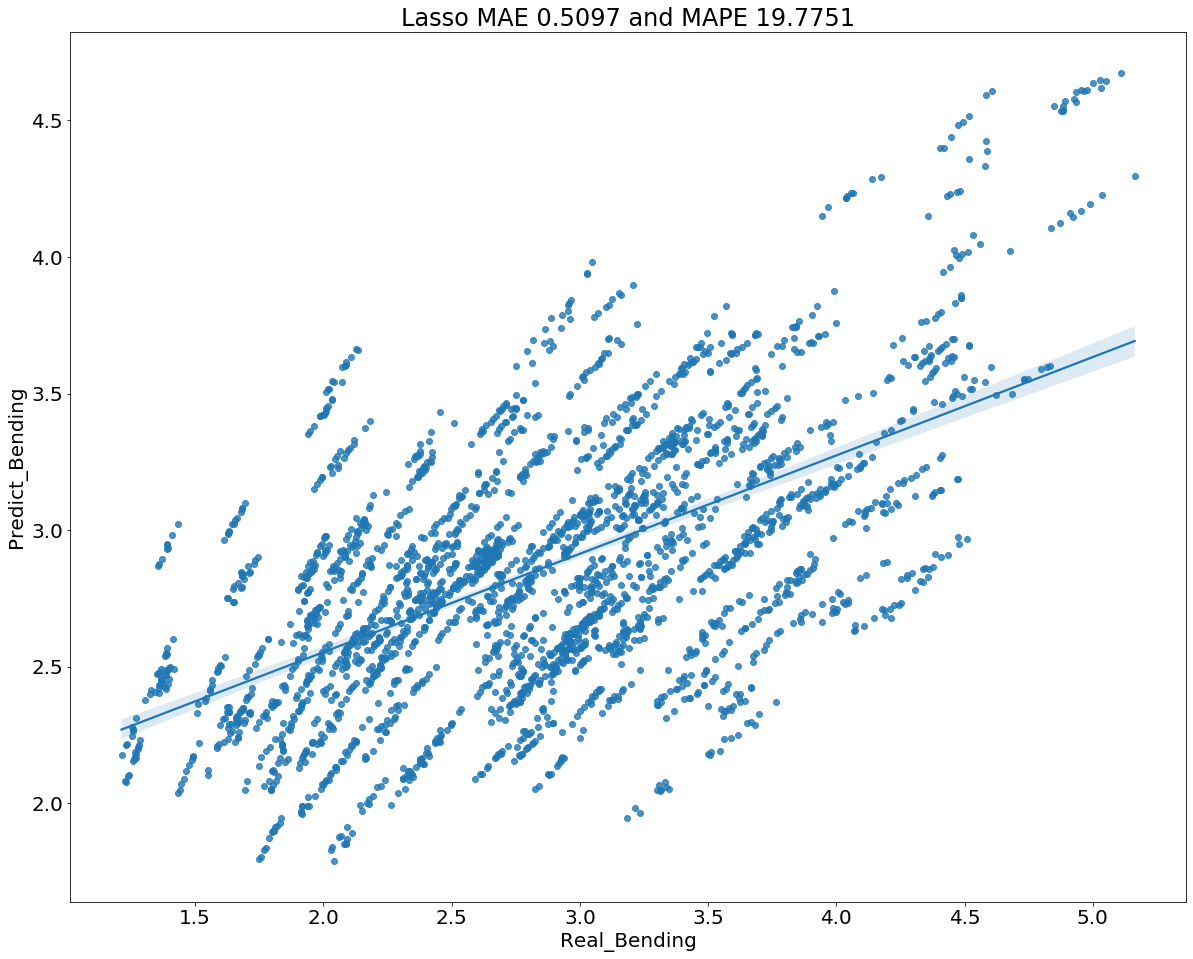

In [96]:
LassoReg = Lasso(alpha =  0.000005)
LassoReg.fit(x_train, y_train)
predict_test = LassoReg.predict(x_test)

mae = MAE(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
mape = MAPE(y_test, predict_test)

print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 score: ', r2)

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']

plt.rc('font',size = 20)
plt.figure(figsize = (20,16))
plt.title('Lasso MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)


# Ridge 활용

Alpha 5e-06 :  score : 0.3658260507125257
R2 score Ridge : 0.37, MSE Ridge : 0.38, MAE Ridge : 0.51

Alpha 1e-05 :  score : 0.3658515352289382
R2 score Ridge : 0.37, MSE Ridge : 0.38, MAE Ridge : 0.51

Alpha 0.0005 :  score : 0.3661093762056812
R2 score Ridge : 0.37, MSE Ridge : 0.38, MAE Ridge : 0.51

Alpha 0.001 :  score : 0.3661143359413711
R2 score Ridge : 0.37, MSE Ridge : 0.38, MAE Ridge : 0.51

Alpha 0.005 :  score : 0.3659902117952355
R2 score Ridge : 0.37, MSE Ridge : 0.38, MAE Ridge : 0.51

Alpha 0.01 :  score : 0.36561482502380893
R2 score Ridge : 0.37, MSE Ridge : 0.38, MAE Ridge : 0.50

Alpha 0.05 :  score : 0.3630849843026266
R2 score Ridge : 0.36, MSE Ridge : 0.38, MAE Ridge : 0.50

Alpha 0.1 :  score : 0.36183609102905523
R2 score Ridge : 0.36, MSE Ridge : 0.38, MAE Ridge : 0.50

Alpha 0.5 :  score : 0.36015529027356163
R2 score Ridge : 0.36, MSE Ridge : 0.38, MAE Ridge : 0.50

Alpha 0.7 :  score : 0.35995601037243885
R2 score Ridge : 0.36, MSE Ridge : 0.38, MAE Ridge :

Text(0.5, 0, 'alpha')

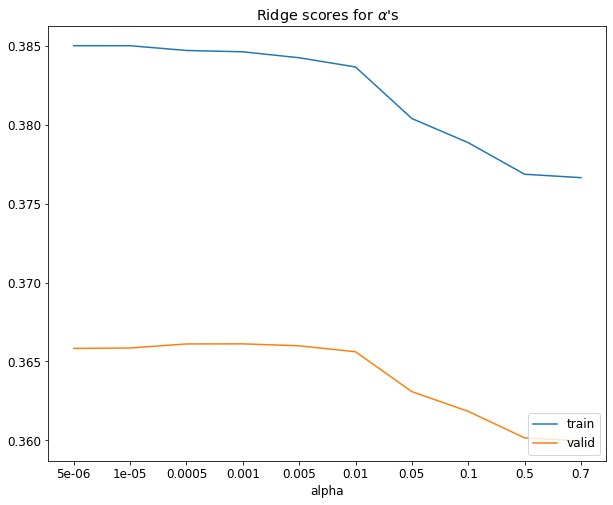

In [88]:
from sklearn.linear_model import Lasso, Ridge, RidgeCV, LinearRegression

#predictors = X_train.columns
alphas = [0.000005, 0.00001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.7]

train_scores = []
test_scores = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x_train, y_train)
    print('Alpha {} : '.format(a), 'score :', ridge.score(x_valid, y_valid))

    s1 = ridge.score(x_train, y_train)
    s2 = ridge.score(x_valid, y_valid)
    train_scores.append(s1)
    test_scores.append(s2)
    
    ridge_y_hat = ridge.predict(x_valid)
    ridge_r2, ridge_MSE, ridge_MAE = r2_score(y_valid, ridge_y_hat), mean_squared_error(y_valid, ridge_y_hat), mean_absolute_error(y_valid, ridge_y_hat)

    print("R2 score Ridge : %.2f, MSE Ridge : %.2f, MAE Ridge : %.2f" %(ridge_r2, ridge_MSE, ridge_MAE))
    print()
    
plt.figure(figsize = (10,8))
plt.rc('font',size = 12)
plt.plot(range(len(alphas)), train_scores)
plt.plot(range(len(alphas)), test_scores)
plt.xticks(range(len(alphas)),alphas)

plt.legend(['train', 'valid', r'$ 10 \times \vert w_0 \vert $'],loc='lower right')
plt.title('Ridge scores for $\\alpha$\'s')
plt.xlabel('alpha')






Mean Absolute Percent Error:  19.3695788955606
Mean Absolute Error:  0.5009409601310533
Mean Squared Error:  0.37562409252628176
R2 score:  0.3786721778181331


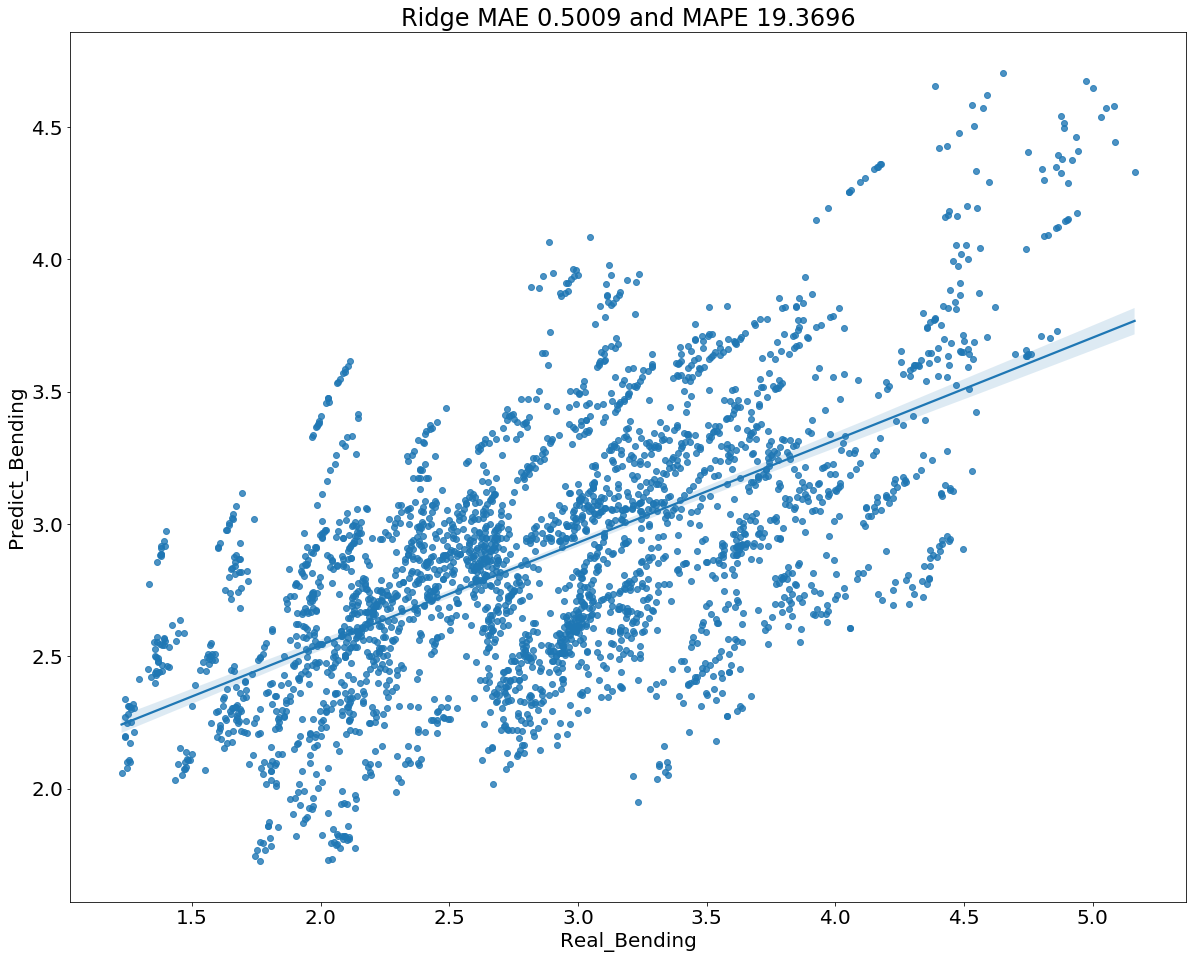

In [17]:
RidgeReg = Ridge(alpha =  0.000005)
RidgeReg.fit(x_train, y_train)
predict_test = RidgeReg.predict(x_test)

mae = MAE(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
mape = MAPE(y_test, predict_test)

print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 score: ', r2)

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']

plt.rc('font',size = 20)
plt.figure(figsize = (20,16))
plt.title('Ridge MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)


In [ ]:
RidgeReg = Ridge(alpha =  0.000005)
RidgeReg.fit(x_train, y_train)

predict_test = RidgeReg.prdict(predict_test)

mae = MAE(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
mape = MAPE(y_test, predict_test)

print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 score: ', r2)

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']

plt.rc('font',size = 20)
plt.figure(figsize = (20,16))
plt.title('Ridge MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)


# LightGBM 활용

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7776
[LightGBM] [Info] Number of data points in the train set: 9120, number of used features: 84
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.868548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

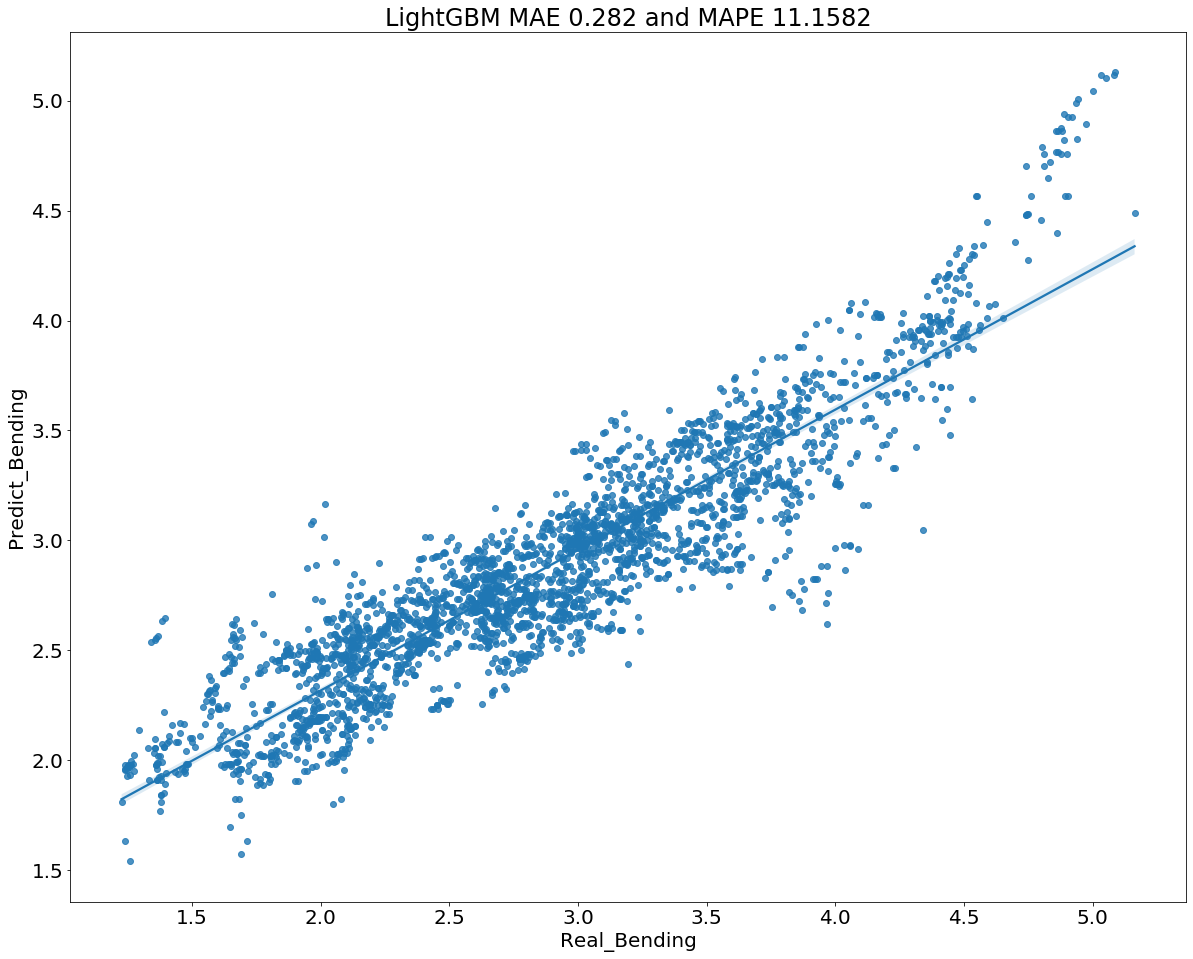

In [11]:
params = {'learning_rate': 0.1, 
          'max_depth': 4, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 20,
         }

train_ds = lgb.Dataset(x_train, label = y_train) 
test_ds = lgb.Dataset(x_test, label = y_test) 

model = lgb.train(params, train_ds, 100, test_ds, verbose_eval=100, early_stopping_rounds=100)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

mae = MAE(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
mape = MAPE(y_test, predict_test)

print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 score: ', r2)

plt.rc('font',size = 20)
plt.figure(figsize = (20,16))
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']
plt.title('LightGBM MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)

In [15]:
lgbm = LGBMRegressor()

#이론적으로 num_leaves = 2^max_depth
params = {'max_depth':  [2, 4, 6, 8],
          'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
          'n_estimators': [250, 500],          
          'num_leaves': [16, 32, 64, 128, 256, 512], 
          }

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='mse',
         eval_set=[(x_train, y_train), (x_valid, y_valid)], verbose = 0)

print("BEST 파라미터: ", grid.best_params_)

BEST 파라미터:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'num_leaves': 32}


# LightGBM 최적화

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7521
[LightGBM] [Info] Number of data points in the train set: 9120, number of used features: 83
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.880087
[1]	valid_0's l2: 0.531646
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 0.484104
[3]	valid_0's l2: 0.436757
[4]	valid_0's l2: 0.399199
[5]	valid_0's l2: 0.369267
[6]	valid_0's l2: 0.341281
[7]	valid_0's l2: 0.320412
[8]	valid_0's l2: 0.300686
[9]	valid_0's l2: 0.281023
[10]	valid_0's l2: 0.264105
[11]	valid_0's l2: 0.246322
[12]	valid_0's l2: 0.230662
[13]	valid_0's l2: 0.220055
[14]	valid_0's l2: 0.207721
[15]	valid_0's l2: 0.197433
[16]	valid_0's l2: 0.18

[250]	valid_0's l2: 0.00729898
[251]	valid_0's l2: 0.00727009
[252]	valid_0's l2: 0.00720913
[253]	valid_0's l2: 0.00718697
[254]	valid_0's l2: 0.00715292
[255]	valid_0's l2: 0.00714577
[256]	valid_0's l2: 0.00713766
[257]	valid_0's l2: 0.00711754
[258]	valid_0's l2: 0.00710837
[259]	valid_0's l2: 0.00708022
[260]	valid_0's l2: 0.00705551
[261]	valid_0's l2: 0.00704575
[262]	valid_0's l2: 0.00702997
[263]	valid_0's l2: 0.00698416
[264]	valid_0's l2: 0.00694814
[265]	valid_0's l2: 0.0069452
[266]	valid_0's l2: 0.00691413
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[267]	valid_0's l2: 0.00690564
[268]	valid_0's l2: 0.00688059
[269]	valid_0's l2: 0.00686702
[270]	valid_0's l2: 0.00684918
[271]	valid_0's l2: 0.00682903
[272]	valid_0's l2: 0.00678998
[273]	valid_0's l2: 0.00676863
[274]	valid_0's l2: 0.00672196
[275]	valid_0's l2: 0.00670008
[276]	valid_0's l2: 0.00668231
[277]	valid_0's l2: 0.00667961
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[438]	valid_0's l2: 0.00526622
[439]	valid_0's l2: 0.00525883
[440]	valid_0's l2: 0.00525222
[441]	valid_0's l2: 0.00524986
[442]	valid_0's l2: 0.00524648
[443]	valid_0's l2: 0.005239
[444]	valid_0's l2: 0.00523168
[445]	valid_0's l2: 0.0052266
[446]	valid_0's l2: 0.00522752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[447]	valid_0's l2: 0.00522775
[448]	valid_0's l2: 0.00522291
[449]	valid_0's l2: 0.00521881
[450]	valid_0's l2: 0.00521748
[451]	valid_0's l2: 0.0052108
[452]	valid_0's l2: 0.00520803
[453]	valid_0's l2: 0.00520358
[454]	valid_0's l2: 0.00520126
[455]	valid_0's l2: 0.00519932
[456]	valid_0's l2: 0.00519841
[457]	valid_0's l2: 0.00519387
[458]	valid_0's l2: 0.00518527
[459]	valid_0's l2: 0.00517545
[460]	valid_0's l2: 0.00517103
[461]	valid_0's l2: 0.00515626
[462]	valid_0's l2: 0.00515437
[463]	valid_0's l2: 0.00515035
[464]	valid_0's l2: 0.00514583
[465]	valid_0's l

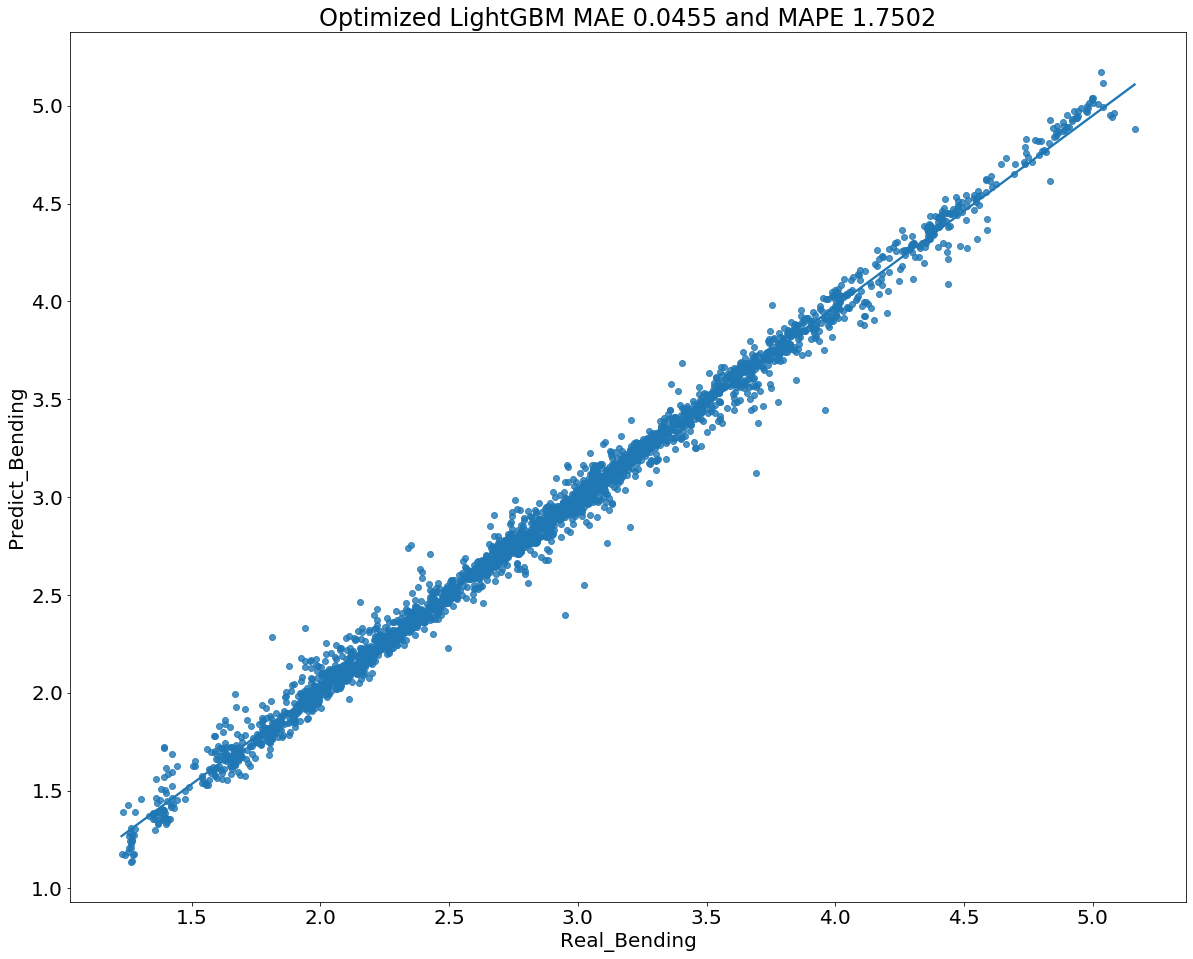

In [28]:
params = {'learning_rate': 0.1, 
          'max_depth': 8, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'num_leaves': 32,
         }

train_ds = lgb.Dataset(x_train, label = y_train) 
valid_ds = lgb.Dataset(x_valid, label = y_valid)
test_ds = lgb.Dataset(x_test, label = y_test) 

model = lgb.train(params, train_ds, 500, valid_ds, early_stopping_rounds=100)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

mae = MAE(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
mape = MAPE(y_test, predict_test)

print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 score: ', r2)

plt.rc('font',size = 20)
plt.figure(figsize = (20,16))
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']
plt.title('Optimized LightGBM MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)

# Feature Importance

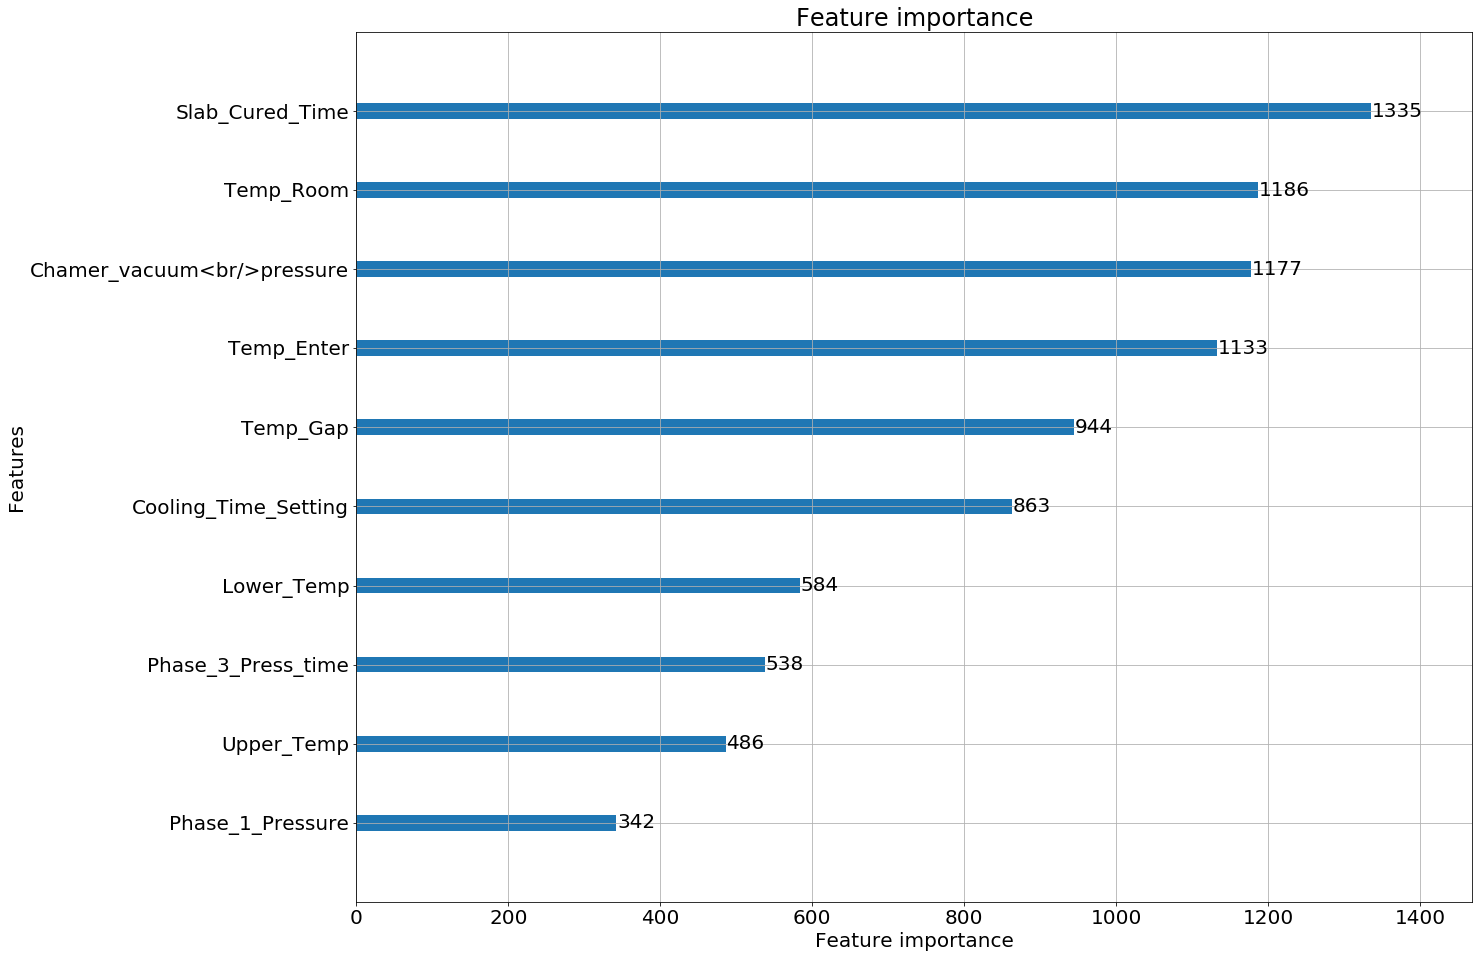

In [18]:
lgb.plot_importance(model, max_num_features = 10, figsize=(20,16))

# 다중공선성 확인

In [22]:
df_copy = df.copy()
df_copy['intercept'] = 1

lm = sm.OLS(df_copy['Bending'], df_copy[['intercept', 'Slab Cured Time', 'Temp Room', 'Chamer vacuum<br/>pressure',
                                        'Temp Enter', 'Temp Gap','Cooling Time Setting', 'Lower Temp',
                                        'Phase 3 Press time', 'Upper Temp', 'Phase 1 Pressure'] ])

results = lm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Bending   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     174.9
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        09:33:24   Log-Likelihood:                -15846.
No. Observations:               14250   AIC:                         3.171e+04
Df Residuals:                   14239   BIC:                         3.180e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept           

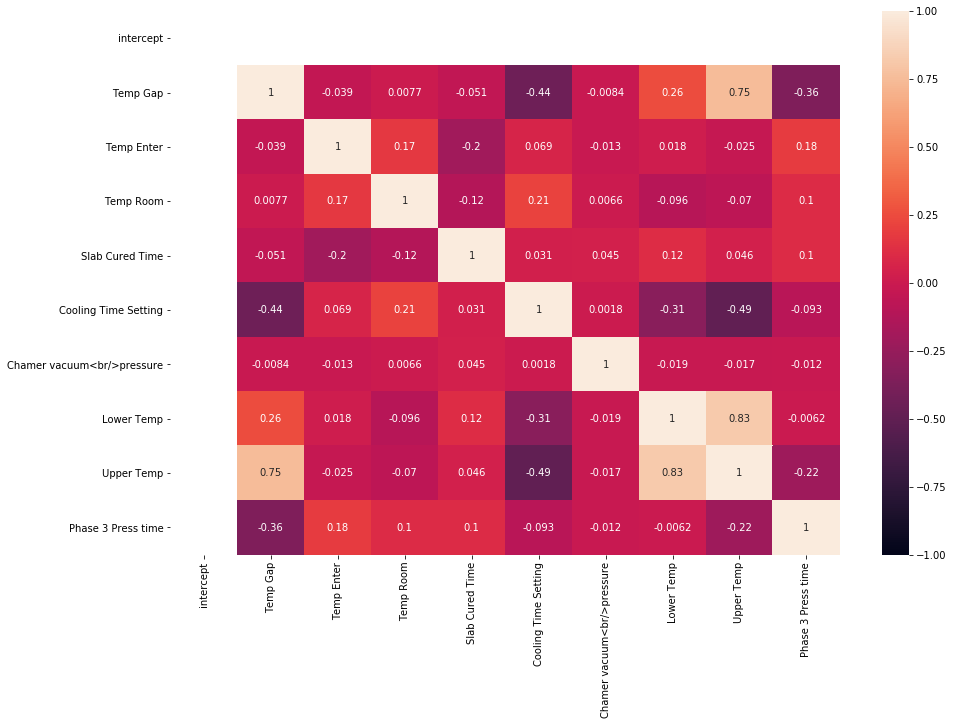

In [23]:
Viatera_corr = df_copy[['intercept','Temp Gap', 'Temp Enter', 'Temp Room', 
                       'Slab Cured Time', 'Cooling Time Setting', 'Chamer vacuum<br/>pressure', 
                       'Lower Temp', 'Upper Temp', 'Phase 3 Press time'] ]

plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(Viatera_corr.corr(),
           annot = True,
           vmin = -1, vmax = 1
           )

In [24]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Viatera_corr.values, i ) for i in range(Viatera_corr.shape[1])]
vif['Features'] = Viatera_corr.columns
vif

,VIF Factor,Features
0,6837.102937,intercept
1,110.901899,Temp Gap
2,1.163020,Temp Enter
3,1.146767,Temp Room
4,1.113957,Slab Cured Time
5,2.378317,Cooling Time Setting
6,1.003578,Chamer vacuum<br/>pressure
7,162.993443,Lower Temp
8,359.579725,Upper Temp
9,1.535858,Phase 3 Press time


# Upper Temp 제거 후 다중공선성 재확인

In [25]:
Viatera_corr = Viatera_corr.drop(['Upper Temp'], axis = 1, )

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Viatera_corr.values, i ) for i in range(Viatera_corr.shape[1])]
vif['Features'] = Viatera_corr.columns
vif

,VIF Factor,Features
0,6716.183347,intercept
1,1.633056,Temp Gap
2,1.127114,Temp Enter
3,1.141386,Temp Room
4,1.112255,Slab Cured Time
5,1.561423,Cooling Time Setting
6,1.003437,Chamer vacuum<br/>pressure
7,1.161622,Lower Temp
8,1.388303,Phase 3 Press time


# Upper Temp 제거 후 LightGBM HyperParameter 최적화

In [26]:
dataset = df.copy()
dataset = dataset.drop(['Upper Temp'],axis = 1)
#dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))   
y_obj=dataset.pop("Bending")

x_train1, x_test, y_train1, y_test = train_test_split(dataset, y_obj, test_size=0.2,shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2,shuffle=True)  ## shuffle=True로 하면 데이터를 섞어서 나눔

lgbm = LGBMRegressor()

#이론적으로 num_leaves = 2^max_depth
params = {'max_depth':  [2, 4, 6, 8],
          'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
          'n_estimators': [250, 500],          
          'num_leaves': [16, 32, 64, 128, 256, 512], 
          }

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='mse',
         eval_set=[(x_train, y_train), (x_valid, y_valid)], verbose = 0)

print("BEST 파라미터: ", grid.best_params_)

BEST 파라미터:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'num_leaves': 128}


# LightGBM 최적화 적용

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7521
[LightGBM] [Info] Number of data points in the train set: 9120, number of used features: 83
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.880087
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

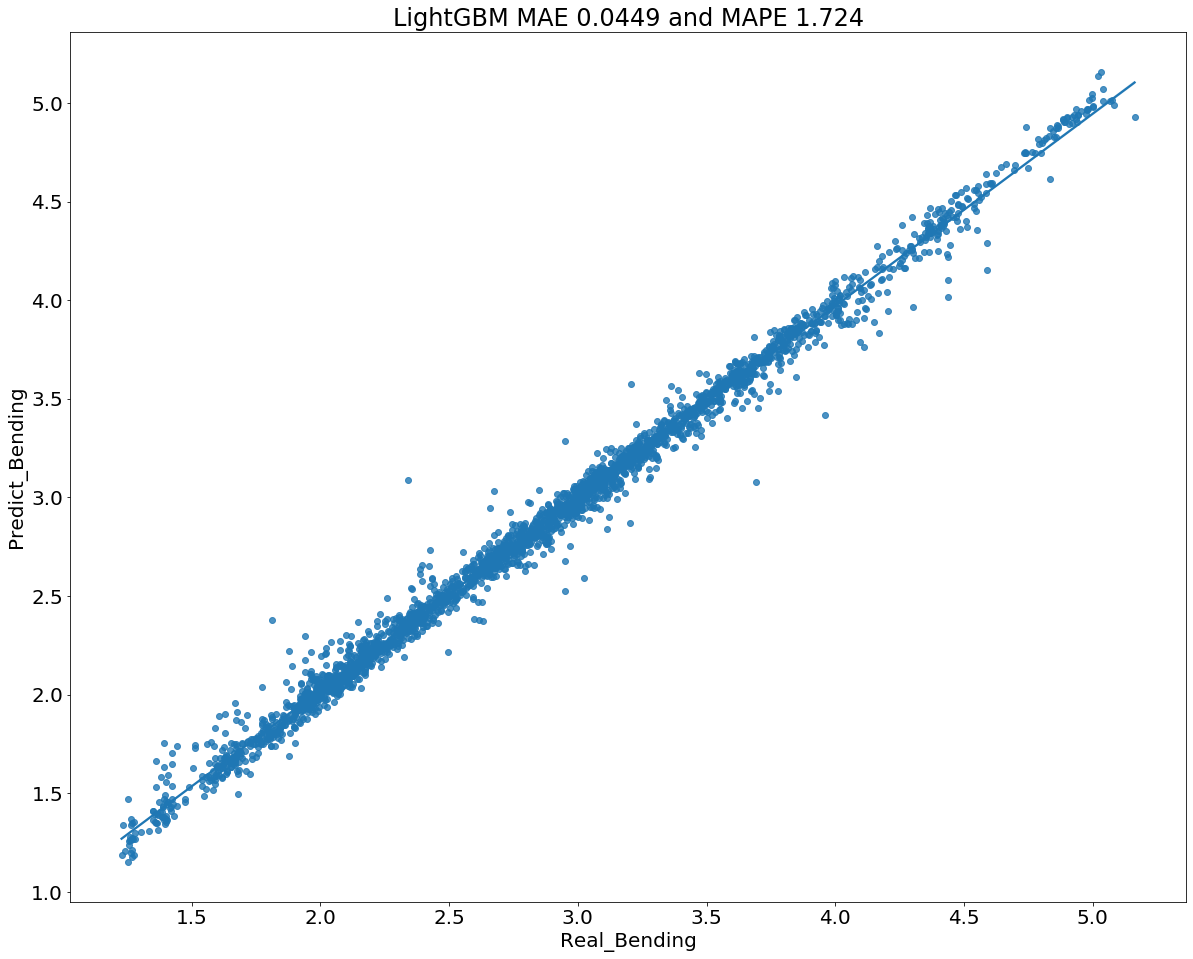

In [27]:
params = {'learning_rate': 0.1, 
          'max_depth': 8, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 128,
         }

train_ds = lgb.Dataset(x_train, label = y_train) 
test_ds = lgb.Dataset(x_test, label = y_test) 

model = lgb.train(params, train_ds, 500, test_ds, verbose_eval=100, early_stopping_rounds=100)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

mae = MAE(y_test, predict_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
mape = MAPE(y_test, predict_test)

print('Mean Absolute Percent Error: ', mape)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 score: ', r2)

plt.rc('font',size = 20)
plt.figure(figsize = (20,16))
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['Real_Bending','Predict_Bending']
plt.title('LightGBM MAE {} and MAPE {}'.format(round(mae,4), round(mape,4)))
sns.regplot(x = 'Real_Bending', y = 'Predict_Bending', data = final_result)